In [12]:
from bokeh.models import NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#names1 = ["Total_Co2_Emissions","Pol_Inst","Technologie","Shock","Lignite","Coal","CCGT","OCGT","Wind_Onshore","Wind_Offshore","Solar","LitIon","PSH","Total"]
data = pd.read_excel(r'Figures_Data_Preparation_9-12.xlsx', sheet_name = 'Figure 9-12', skiprows=[1])
#df = df.set_index([df.iloc[0], df.columns[0]])
data.head()

,Row,Total_CO2_Emissions,Pol_Inst,Technologie,Shock,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Lignite,Hard Coal,CCGT,OCGT,Wind Onshore,Wind Offshore,PV,Li-Ion,PSH,Mixed
0,1455555555,1503.6,CO2_Cap,Lignite,-0.1,455555555,1,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1535555555,1503.6,CO2_Cap,Gas,-0.2,535555555,2,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1545555555,1503.6,CO2_Cap,Gas,-0.1,545555555,2,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1553555555,1503.6,CO2_Cap,Hardcoal,-0.2,553555555,3,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1554555555,1503.6,CO2_Cap,Hardcoal,-0.1,554555555,3,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.dtypes

Row                      int64
Total_CO2_Emissions    float64
Pol_Inst                object
Technologie             object
Shock                  float64
Unnamed: 5               int64
Unnamed: 6               int64
Unnamed: 7             float64
Unnamed: 8             float64
Unnamed: 9             float64
Lignite                float64
Hard Coal                int64
CCGT                   float64
OCGT                   float64
Wind Onshore           float64
Wind Offshore          float64
PV                     float64
Li-Ion                 float64
PSH                    float64
Mixed                  float64
dtype: object

In [14]:
data.columns


Index(['Row', 'Total_CO2_Emissions', 'Pol_Inst', 'Technologie', 'Shock',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed'],
      dtype='object')

In [15]:
data["Technologie"]= data["Technologie"].replace("Lignite", "Lignite Fuel Cost")
data["Technologie"]= data["Technologie"].replace("Gas", "Gas Fuel Cost")
data["Technologie"]= data["Technologie"].replace("Hard coal", "Hard coal Fuel Cost")
data["Technologie"]= data["Technologie"].replace("Solar", "PV Investment Cost")
data["Technologie"]= data["Technologie"].replace("Lit_Ion", "Li-Ion  Investment Cost")
data["Technologie"]= data["Technologie"].replace("Wind_Onshore", "Wind Onshore  Investment Cost")
data["Technologie"]= data["Technologie"].replace("Wind_Offshore", "Wind Offshore Investment Cost")


# data["Technologie"]= data["Technologie"].replace("Hardcoal", "Hard coal")
# data["Technologie"]= data["Technologie"].replace("Solar", "PV")
# data["Technologie"]= data["Technologie"].replace("Wind_Onshore", "Wind Onshore")
# data["Technologie"]= data["Technologie"].replace("Wind_Offshore", "Wind Offshore")
# data["Technologie"]= data["Technologie"].replace("Lit_Ion", "Li-Ion")
data0 = data[['Technologie', "Shock", "Pol_Inst" ,'Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed']]
data0.Technologie.unique()

array(['Lignite Fuel Cost', 'Gas Fuel Cost', 'Hardcoal', 'Demand',
       'PV Investment Cost', 'Wind Onshore  Investment Cost',
       'Wind Offshore Investment Cost', 'Li-Ion  Investment Cost', 'PSH',
       'no'], dtype=object)

In [16]:
data0 = data0.loc[data['Technologie']!='no']
data0 = data0.loc[(data["Shock"] == -0.2) | (data["Shock"] == 0.2)]

data0.Technologie.unique()



array(['Gas Fuel Cost', 'Hardcoal', 'Demand', 'PV Investment Cost',
       'Wind Onshore  Investment Cost', 'Wind Offshore Investment Cost',
       'Li-Ion  Investment Cost', 'PSH', 'Lignite Fuel Cost'],
      dtype=object)

In [17]:
data_co2_cap0 = data0.loc[data['Pol_Inst']=='Min_RES_Quota']

In [18]:
data_co2_cap = data_co2_cap0[['Technologie','Lignite', 'Hard Coal', 'CCGT', 'OCGT', 'Wind Onshore', 'Wind Offshore',
       'PV', 'Li-Ion', 'PSH', 'Mixed']]

In [19]:
data_co2_cap.Technologie.unique()

array(['Lignite Fuel Cost', 'Gas Fuel Cost', 'Hardcoal', 'Demand',
       'PV Investment Cost', 'Wind Onshore  Investment Cost',
       'Wind Offshore Investment Cost', 'Li-Ion  Investment Cost', 'PSH'],
      dtype=object)

In [20]:
data_co2_cap0

data_co2_cap['Technologie'] = pd.Categorical(data_co2_cap0['Technologie'], [ 'Lignite Fuel Cost', 'Gas Fuel Cost', 'Hard coal Fuel Cost', 'PV Investment Cost', 'Wind Onshore Investment Cost',
       'Wind Offshore Investment Cost', 'Li-Ion Investment Cost', 'PSH Investment Cost', 'Demand'])
data_co2_cap.sort_values("Technologie")
data_co2_cap

<ipython-input-20-16888556a35d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_co2_cap['Technologie'] = pd.Categorical(data_co2_cap0['Technologie'], [ 'Lignite Fuel Cost', 'Gas Fuel Cost', 'Hard coal Fuel Cost', 'PV Investment Cost', 'Wind Onshore Investment Cost',


,Technologie,Lignite,Hard Coal,CCGT,OCGT,Wind Onshore,Wind Offshore,PV,Li-Ion,PSH,Mixed
36,Lignite Fuel Cost,0.00,0,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
38,Gas Fuel Cost,-0.01,0,-0.01,0.00,0.00,0.00,0.00,0.02,-0.01,0.00
40,NaN,0.00,0,-0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00
42,Demand,-0.27,0,-0.31,-0.39,-0.36,-0.36,-0.34,-0.43,-0.28,-0.35
44,PV Investment Cost,0.00,0,-0.01,0.00,0.00,-0.02,-0.18,0.04,-0.05,-0.06
46,NaN,0.00,0,-0.01,0.00,-0.17,-0.11,-0.04,-0.03,-0.02,-0.08
48,Wind Offshore Investment Cost,0.00,0,-0.02,0.00,-0.14,-0.17,-0.06,0.00,-0.02,-0.10
50,NaN,0.00,0,-0.01,0.00,0.00,0.00,0.00,-0.09,-0.01,0.00
52,NaN,0.00,0,0.00,0.00,0.00,0.00,0.00,-0.11,-0.15,-0.03
56,NaN,0.00,0,0.00,0.00,0.00,0.00,0.00,0.04,0.08,0.01


In [21]:
#hue1 = ["#ADD8E6", "#414141", "#FFA500", "#fff340", "#00b8f2", "#a19595", "#f23333", "#2397fc"]

#hue1

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
df_melt=pd.melt(data_co2_cap,id_vars=['Technologie'], var_name='intensities', value_name='values')
df_melt

,Technologie,intensities,values
0,Lignite Fuel Cost,Lignite,0.00
1,Gas Fuel Cost,Lignite,-0.01
2,NaN,Lignite,0.00
3,Demand,Lignite,-0.27
4,PV Investment Cost,Lignite,0.00
...,...,...,...
175,PV Investment Cost,Mixed,0.03
176,Demand,Mixed,0.00
177,NaN,Mixed,0.00
178,Gas Fuel Cost,Mixed,0.00


In [23]:
#df = df_melt[(df_melt[['values']] != 0).all(axis=1)]


In [24]:
# data["Technologie"].unique()
df_melt['values']=df_melt['values'].replace(0, np.nan)
df_melt
#['Technologie','Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
#       'Solar', 'LitIon', 'PSH', 'Total']

,Technologie,intensities,values
0,Lignite Fuel Cost,Lignite,NaN
1,Gas Fuel Cost,Lignite,-0.01
2,NaN,Lignite,NaN
3,Demand,Lignite,-0.27
4,PV Investment Cost,Lignite,NaN
...,...,...,...
175,PV Investment Cost,Mixed,0.03
176,Demand,Mixed,NaN
177,NaN,Mixed,NaN
178,Gas Fuel Cost,Mixed,NaN


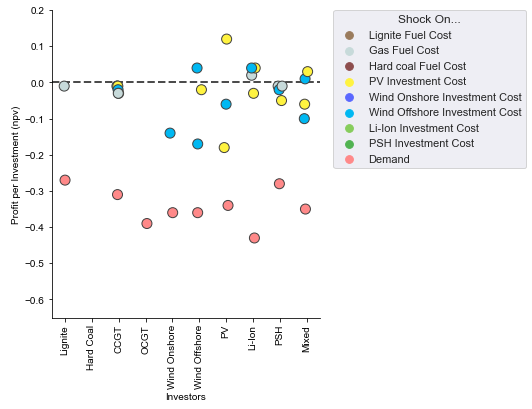

In [25]:
import matplotlib.pyplot as plt
#sns.set_palette(sns.color_palette(hue1))
ax = sns.catplot(x="intensities", y="values", data=df_melt,linewidth=1, s=10, hue='Technologie', palette = sns.color_palette(["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#ff8989"]))
sns.set(rc={'figure.figsize':(20,15)})

ax.set_xticklabels(rotation = 90)

ax.axes[0][0].axhline(y = 0, ls='--', color='black', linewidth=2, alpha=.7)
ax._legend.remove()
ax.set_axis_labels("","")
#ax.set_xlim((-0.65,0.2))
ax._legend.set_title("Shock on...")
# ax.set_xlabels()
ax.set_ylabels("Profit per Investment (npv)")
ax.set_xlabels("Investors")
plt.ylim(-0.65,0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Shock On...");

In [26]:
df_melt.head(200)

,Technologie,intensities,values
0,Lignite Fuel Cost,Lignite,NaN
1,Gas Fuel Cost,Lignite,-0.01
2,NaN,Lignite,NaN
3,Demand,Lignite,-0.27
4,PV Investment Cost,Lignite,NaN
...,...,...,...
175,PV Investment Cost,Mixed,0.03
176,Demand,Mixed,NaN
177,NaN,Mixed,NaN
178,Gas Fuel Cost,Mixed,NaN


In [27]:

ax.savefig("images\Figure12_Min_RES_Quota.svg")